<a href="https://colab.research.google.com/github/AnshulShete/FMML_Projects_-_lab/blob/main/AnshulShete_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Example texts
texts = [
    "This is the first example text. It contains several words.",


SyntaxError: incomplete input (<ipython-input-1-a6dda4a8f201>, line 12)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Text 1: This is the first example text. It contains several words.


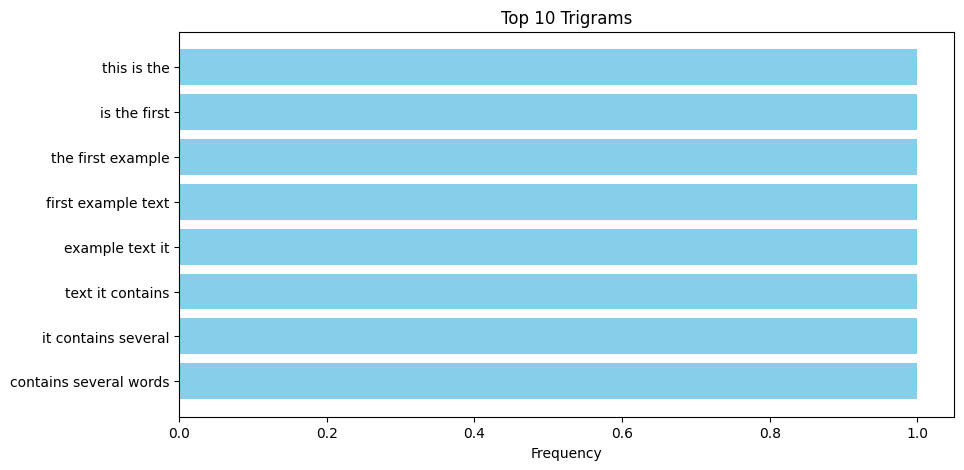

Text 2: Here is another example. This example is slightly different.


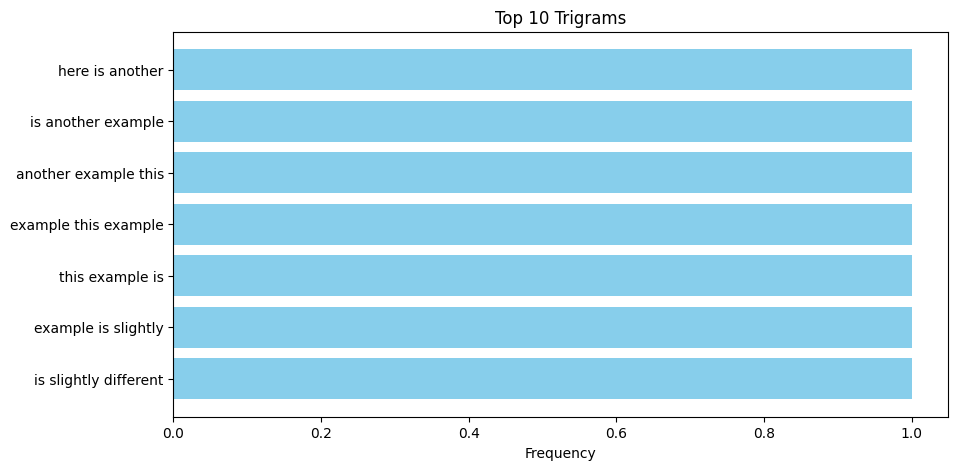

Text 3: Yet another text to show how trigram extraction works.


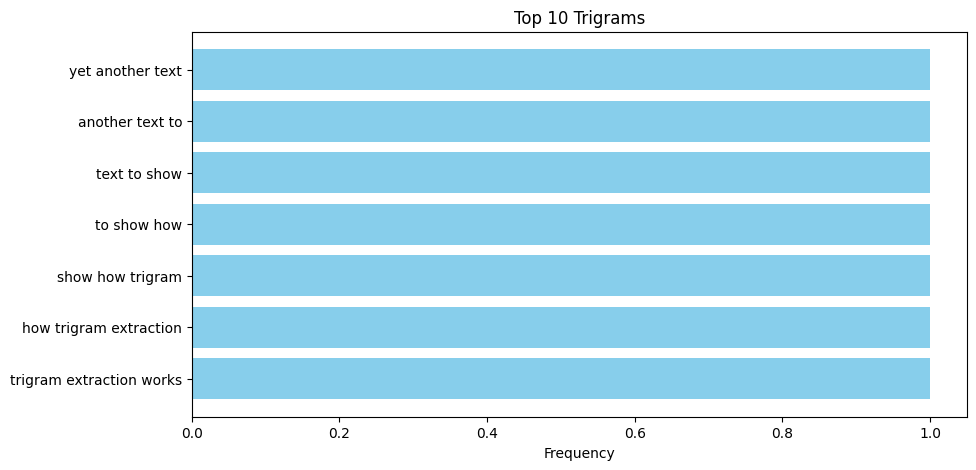

In [2]:
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK data if not already downloaded
nltk.download('punkt')

# Example texts
texts = [
    "This is the first example text. It contains several words.",
    "Here is another example. This example is slightly different.",
    "Yet another text to show how trigram extraction works."
]

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text.lower())
    # Remove punctuation tokens
    tokens = [token for token in tokens if token.isalpha()]
    return tokens

def extract_and_plot_trigrams(text, top_n=10):
    # Preprocess the text
    tokens = preprocess_text(text)
    # Extract trigrams
    trigrams = list(ngrams(tokens, 3))
    # Count trigram frequencies
    trigram_freq = Counter(trigrams)
    # Get the top N trigrams
    most_common_trigrams = trigram_freq.most_common(top_n)

    # Prepare data for plotting
    trigram_labels, trigram_counts = zip(*most_common_trigrams)
    trigram_labels = [' '.join(trigram) for trigram in trigram_labels]

    # Plot the top N trigrams
    plt.figure(figsize=(10, 5))
    plt.barh(trigram_labels, trigram_counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title('Top 10 Trigrams')
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest at the top
    plt.show()

# Process and plot trigrams for each text
for i, text in enumerate(texts):
    print(f"Text {i+1}: {text}")
    extract_and_plot_trigrams(text)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


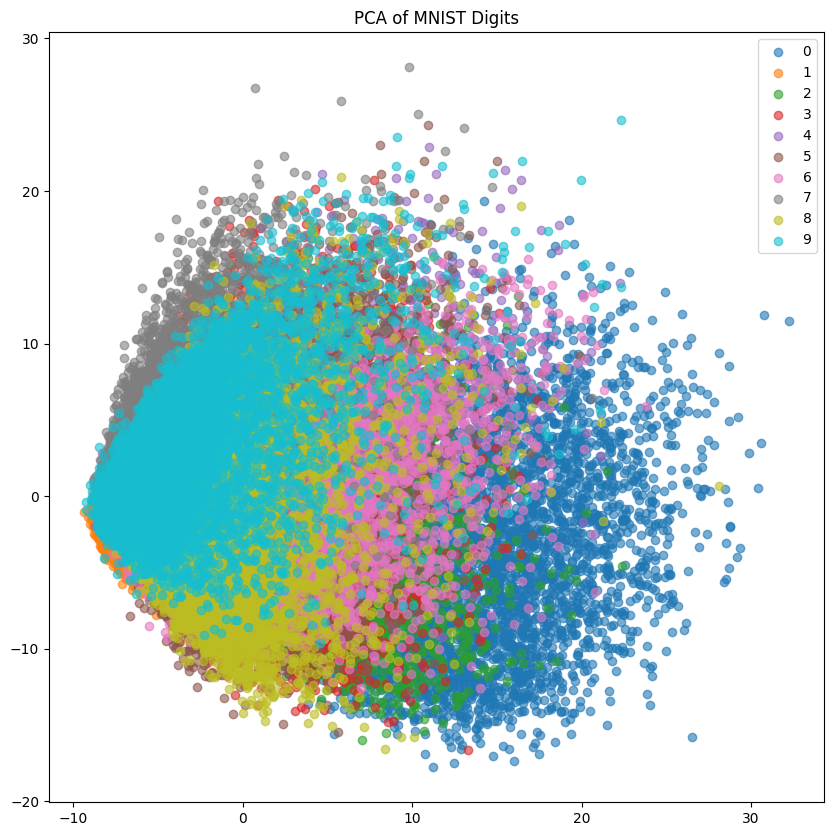

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images and scale the data
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)
scaler = StandardScaler()
x_train_flat_scaled = scaler.fit_transform(x_train_flat)

# Function to plot the results
def plot_embedding(X, y, title=None):
    plt.figure(figsize=(10, 10))
    for i in range(10):
        indices = y == i
        plt.scatter(X[indices, 0], X[indices, 1], label=str(i), alpha=0.6)
    plt.legend()
    if title is not None:
        plt.title(title)
    plt.show()

# Perform PCA
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train_flat_scaled)
plot_embedding(x_pca, y_train, title="PCA of MNIST Digits")

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_train_flat_scaled)
plot_embedding(x_tsne, y_train, title="t-SNE of MNIST Digits")

